Import necessary libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.decomposition import PCA
import warnings

Load the dataset

In [61]:
df = pd.read_csv('heart.csv')

Display shape, info, describe and others

In [62]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [63]:
df.shape

(918, 12)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [65]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [66]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [67]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [68]:
df.isnull().sum().sum()

np.int64(0)

Identifying categorical and numerical columns

In [69]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

Checking for outliers using boxplots (numerical columns)

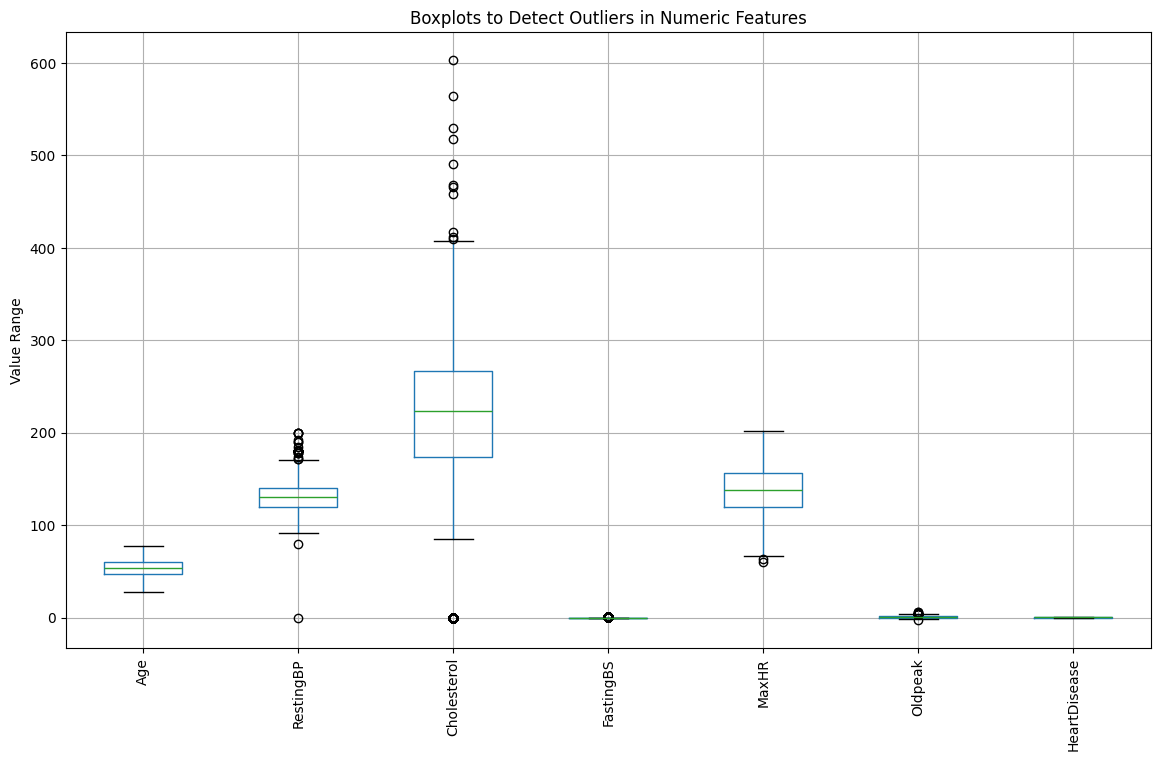

In [70]:
plt.figure(figsize=(14, 8))
df[numerical_cols].boxplot(rot=90)
plt.title("Boxplots to Detect Outliers in Numeric Features")
plt.ylabel("Value Range")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Boxplots for Selected Numeric Features')

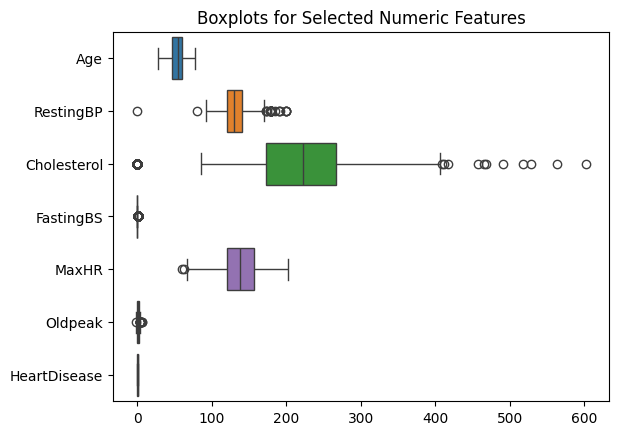

In [71]:
sns.boxplot(data=df[numerical_cols], orient='h')
plt.title("Boxplots for Selected Numeric Features")

Analyzing outliers by skew function

In [72]:
df[numerical_cols].skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

<Figure size 1400x800 with 0 Axes>

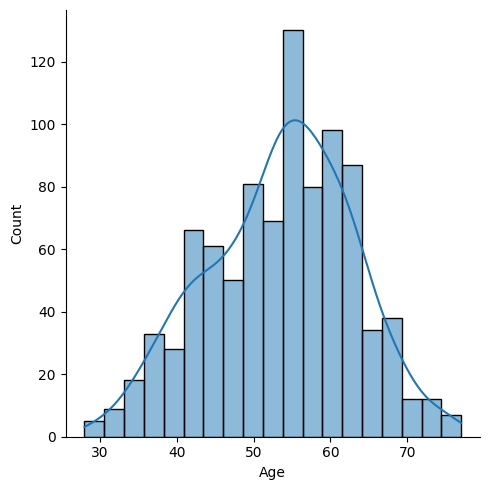

<Figure size 1400x800 with 0 Axes>

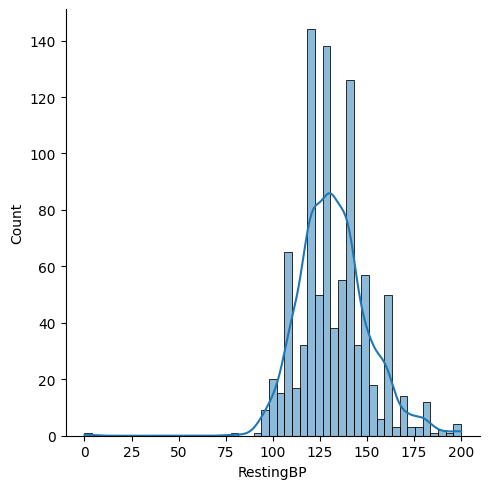

<Figure size 1400x800 with 0 Axes>

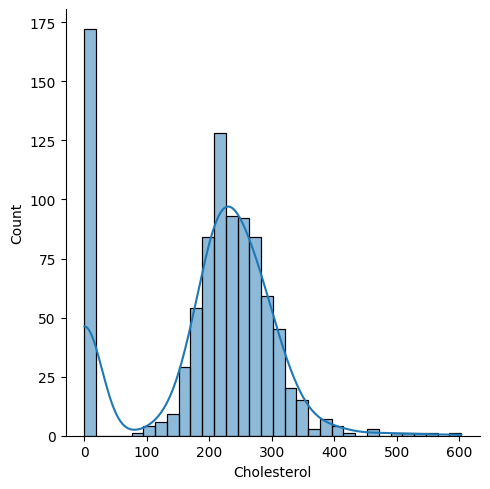

<Figure size 1400x800 with 0 Axes>

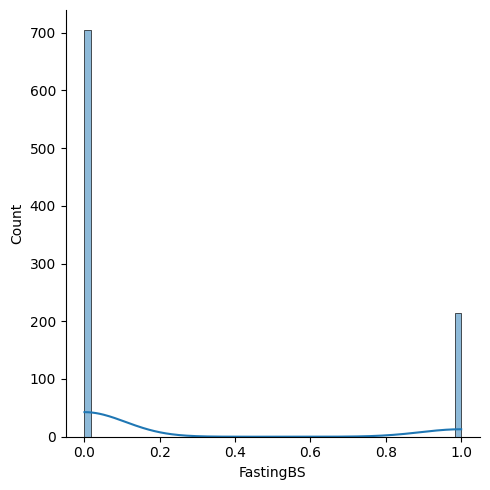

<Figure size 1400x800 with 0 Axes>

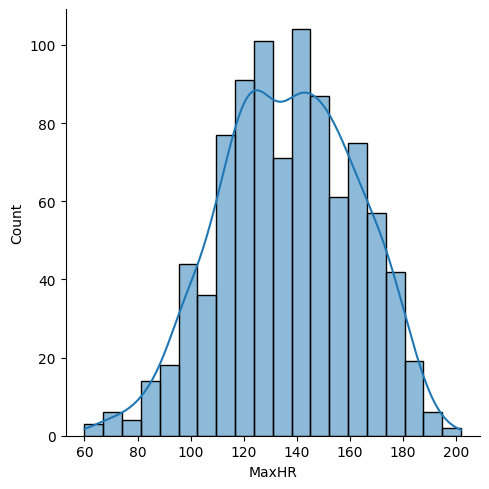

<Figure size 1400x800 with 0 Axes>

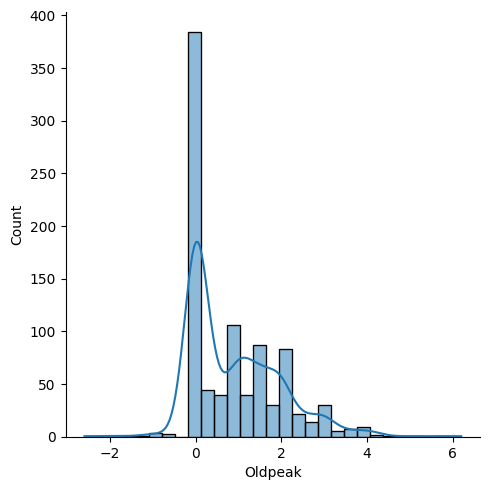

<Figure size 1400x800 with 0 Axes>

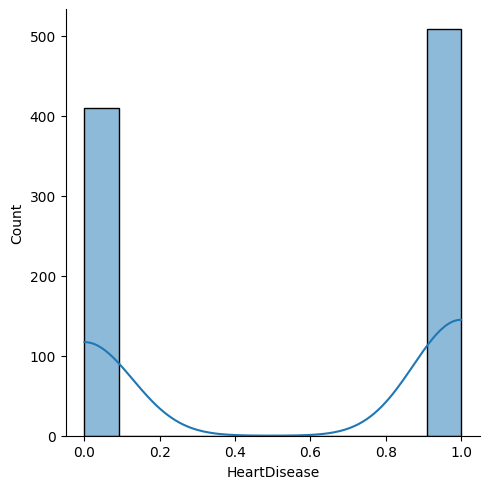

In [73]:
for col in numerical_cols:
    plt.figure(figsize=(14, 8))
    sns.displot(df[col], kde=True)
    plt.show()
 


function for replacing the outliers with the mean value

In [74]:

def replace_outliers_with_mean(df, columns, threshold=1.5):
    
    
    df_clean = df.copy()
    
    for col in columns:
        if col in df.columns:
            # Calculate Q1, Q3 and IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
        
            outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
            
            col_mean = df.loc[~outliers, col].mean()
            
            df_clean.loc[outliers, col] = col_mean
            
            print(f"Column '{col}': Replaced {outliers.sum()} outliers with mean {col_mean:.2f}")
        else:
            print(f"Warning: Column '{col}' not found in dataframe")
    
    return df_clean

separating the outlier columns for sending to the replace_outliers_with_mean function

In [75]:
columns_to_process = ['RestingBP','MaxHR']

In [76]:
df = replace_outliers_with_mean(df, columns_to_process)

Column 'RestingBP': Replaced 28 outliers with mean 131.11
Column 'MaxHR': Replaced 2 outliers with mean 136.97


C:\Users\HP\AppData\Local\Temp\ipykernel_11416\370093384.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '131.1134831460674' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[outliers, col] = col_mean
C:\Users\HP\AppData\Local\Temp\ipykernel_11416\370093384.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '136.97379912663754' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[outliers, col] = col_mean


After replacing the outliers

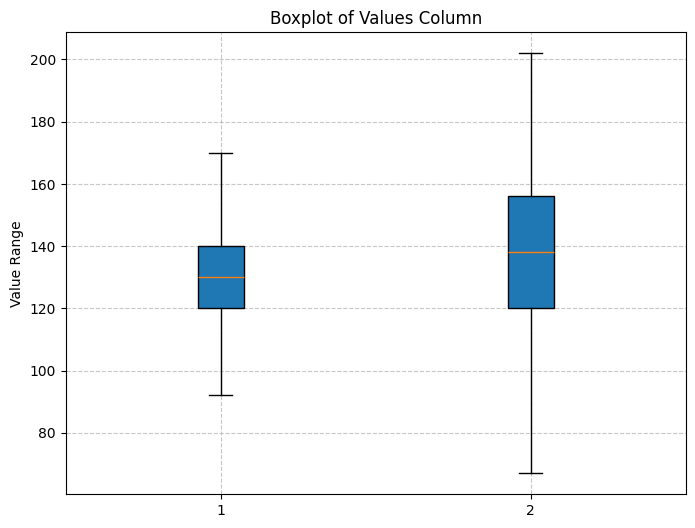

In [77]:
plt.figure(figsize=(8, 6))
plt.boxplot(df[columns_to_process], vert=True, patch_artist=True)
plt.title('Boxplot of Values Column')
plt.ylabel('Value Range')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

function for replacing the outliers with the mode value

In [78]:

def replace_outliers_with_mode(df, columns, threshold=1.5):
    
    
    df_clean2 = df.copy()
    
    for col in columns:
        if col in df.columns:
         
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
                    
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
            
            col_mode = df.loc[~outliers, col].mode()[0]
            
            df_clean2.loc[outliers, col] = col_mode
            
            print(f"Column '{col}': Replaced {outliers.sum()} outliers with mode {col_mode:.2f}")
        else:
            print(f"Warning: Column '{col}' not found in dataframe")
    
    return df_clean2

separating the outlier columns for sending to the replace_outliers_with_mode function

In [79]:
columns_to_process = ['Oldpeak']

In [80]:
df = replace_outliers_with_mode(df, columns_to_process)

Column 'Oldpeak': Replaced 16 outliers with mode 0.00


After replacing the outliers

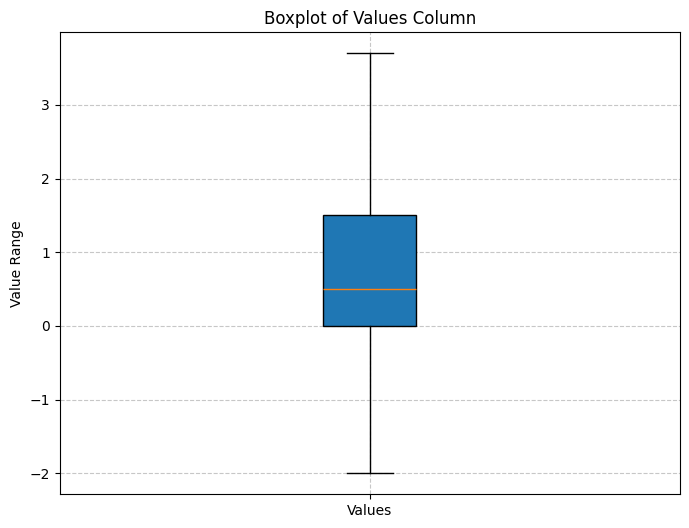

In [81]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Oldpeak'], vert=True, patch_artist=True)
plt.title('Boxplot of Values Column')
plt.ylabel('Value Range')
plt.xticks([1], ['Values']) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

function for replacing the outliers with the Median value

In [82]:

def replace_outliers_with_median(df, columns, threshold=1.5):
    
    
    df_clean3 = df.copy()
    
    for col in columns:
        if col in df.columns:
        
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
            
            col_median = df.loc[~outliers, col].median()
            
            df_clean3.loc[outliers, col] = col_median
            
            print(f"Column '{col}': Replaced {outliers.sum()} outliers with median {col_median:.2f}")
        else:
            print(f"Warning: Column '{col}' not found in dataframe")
    
    return df_clean3

separating the outlier columns for sending to the replace_outliers_with_median, replace_outliers_with_mode and replace_outliers_with_mean functions

In [83]:
columns_to_process = ['Cholesterol']

In [84]:
df1 = replace_outliers_with_median(df, columns_to_process)

Column 'Cholesterol': Replaced 183 outliers with median 236.00


After replacing the outliers

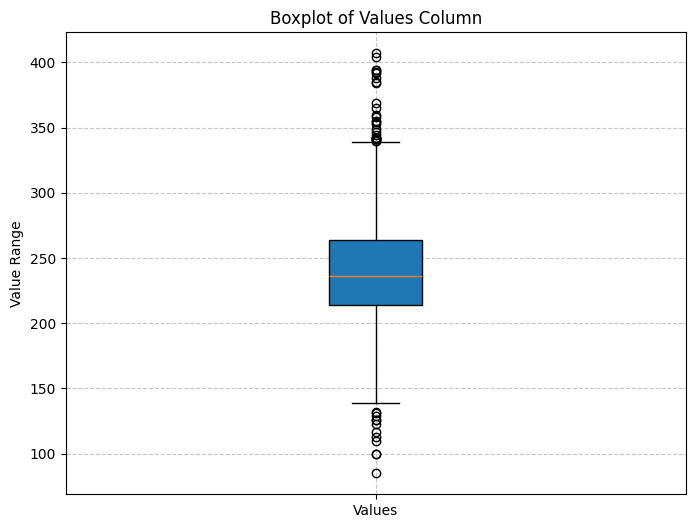

In [85]:
plt.figure(figsize=(8, 6))
plt.boxplot(df1['Cholesterol'], vert=True, patch_artist=True)
plt.title('Boxplot of Values Column')
plt.ylabel('Value Range')
plt.xticks([1], ['Values']) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [86]:
df2 = replace_outliers_with_mean(df, columns_to_process)

Column 'Cholesterol': Replaced 183 outliers with mean 241.04


C:\Users\HP\AppData\Local\Temp\ipykernel_11416\370093384.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '241.03809523809525' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[outliers, col] = col_mean


After replacing the outliers

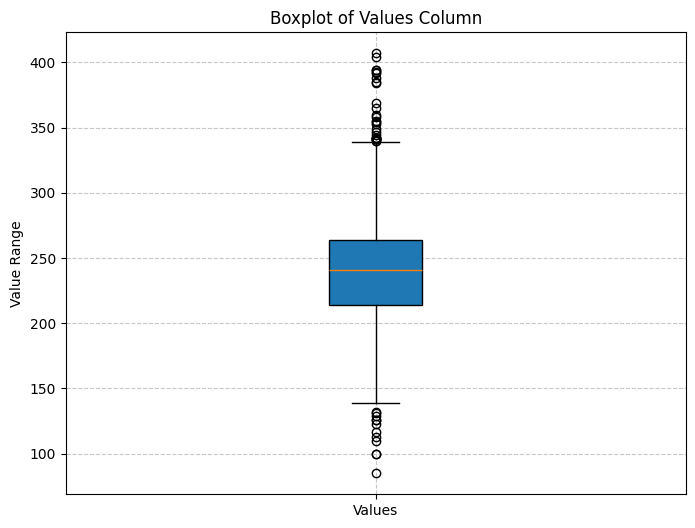

In [87]:
plt.figure(figsize=(8, 6))
plt.boxplot(df2['Cholesterol'], vert=True, patch_artist=True)
plt.title('Boxplot of Values Column')
plt.ylabel('Value Range')
plt.xticks([1], ['Values'])  
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [88]:
df3 = replace_outliers_with_mode(df, columns_to_process)

Column 'Cholesterol': Replaced 183 outliers with mode 254.00


After replacing the outliers

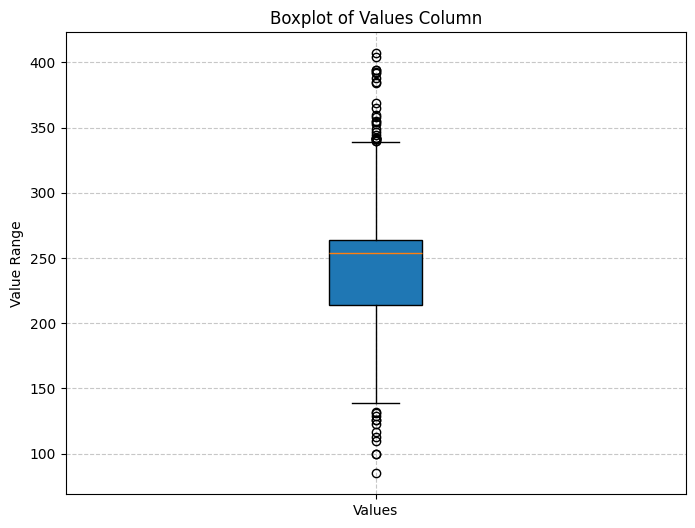

In [89]:
plt.figure(figsize=(8, 6))
plt.boxplot(df3['Cholesterol'], vert=True, patch_artist=True)
plt.title('Boxplot of Values Column')
plt.ylabel('Value Range')
plt.xticks([1], ['Values']) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Final search for finding the column to drop whose outliers can't be handled.

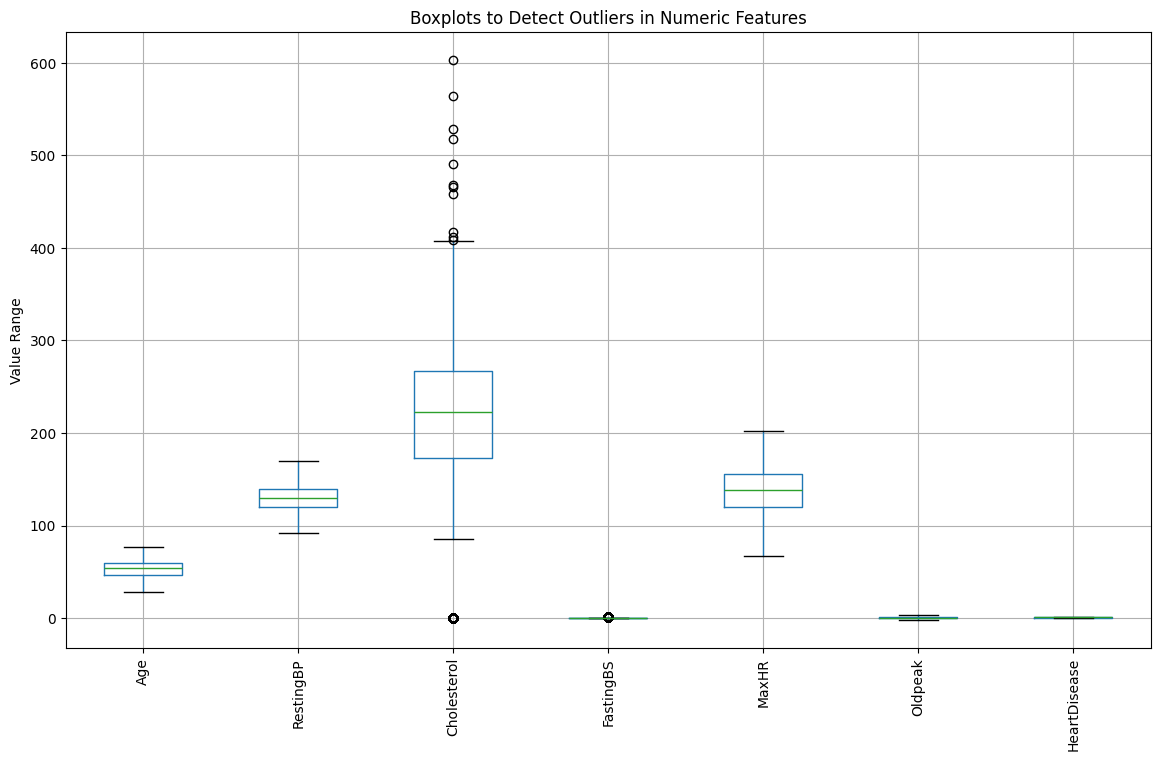

In [90]:
plt.figure(figsize=(14, 8))
df[numerical_cols].boxplot(rot=90)
plt.title("Boxplots to Detect Outliers in Numeric Features")
plt.ylabel("Value Range")
plt.grid(True)
plt.show()

In [91]:
df= df.drop(columns=['Cholesterol'])

In [92]:
df.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,0,Normal,122.0,N,0.0,Up,0


Encoding for categorical data

In [93]:
categorical_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Separating categorical columns for label_encoding and one_hot_encoding

In [94]:
categorical_for_label_encoding = [col for col in categorical_cols if col != 'Sex']

In [95]:
categorical_for_label_encoding

['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Doing one hot encoding for sex column

In [96]:
Sex_onehot = pd.get_dummies(df['Sex'], prefix='Sex')
Sex_onehot

,Sex_F,Sex_M
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
913,False,True
914,False,True
915,False,True
916,True,False


Concating additional one hot columns and droping the previous column

In [97]:
df = pd.concat([df, Sex_onehot], axis=1)
df= df.drop(columns=['Sex'])

In [98]:
df.head()

,Age,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M
0,40,ATA,140.0,0,Normal,172.0,N,0.0,Up,0,False,True
1,49,NAP,160.0,0,Normal,156.0,N,1.0,Flat,1,True,False
2,37,ATA,130.0,0,ST,98.0,N,0.0,Up,0,False,True
3,48,ASY,138.0,0,Normal,108.0,Y,1.5,Flat,1,True,False
4,54,NAP,150.0,0,Normal,122.0,N,0.0,Up,0,False,True


Doing label encoding

In [99]:
le = LabelEncoder()
categorical_for_label_encoding

['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [100]:
for col in categorical_for_label_encoding:
    df[col] = le.fit_transform(df[col])

In [101]:
df.head()

,Age,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M
0,40,1,140.0,0,1,172.0,0,0.0,2,0,False,True
1,49,2,160.0,0,1,156.0,0,1.0,1,1,True,False
2,37,1,130.0,0,2,98.0,0,0.0,2,0,False,True
3,48,0,138.0,0,1,108.0,1,1.5,1,1,True,False
4,54,2,150.0,0,1,122.0,0,0.0,2,0,False,True


Visualization

Analyzing the correlation among the columns of the dataset using Heat Map

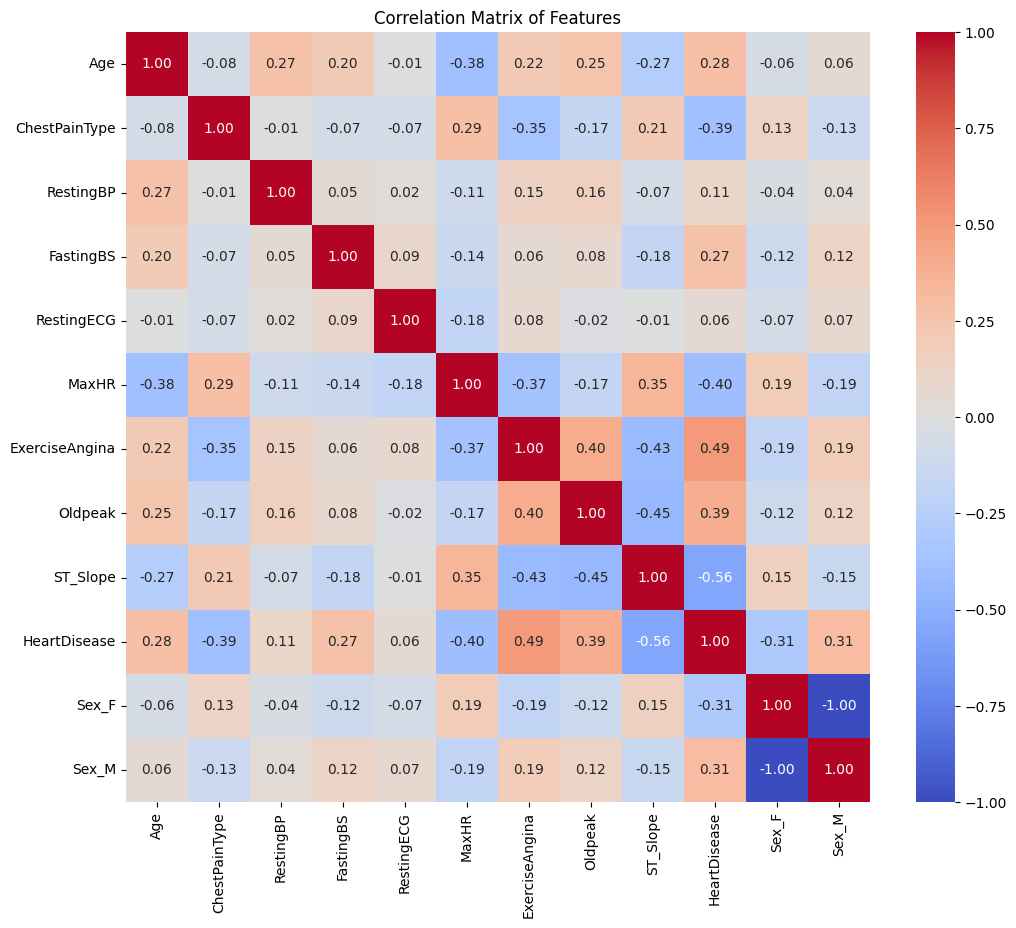

In [102]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Relationship between features and target ('HeartDisease')

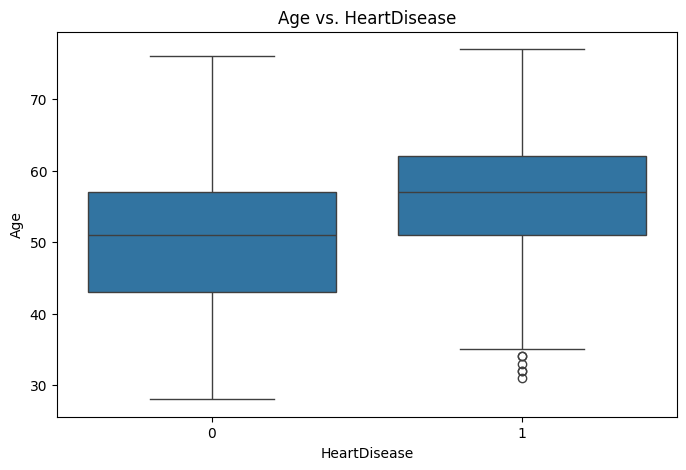

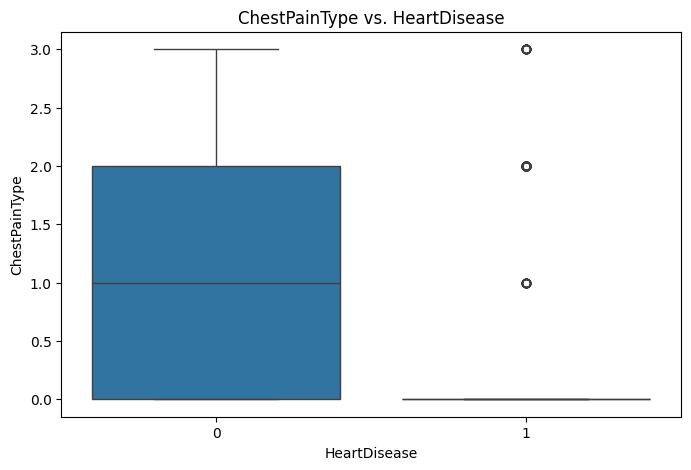

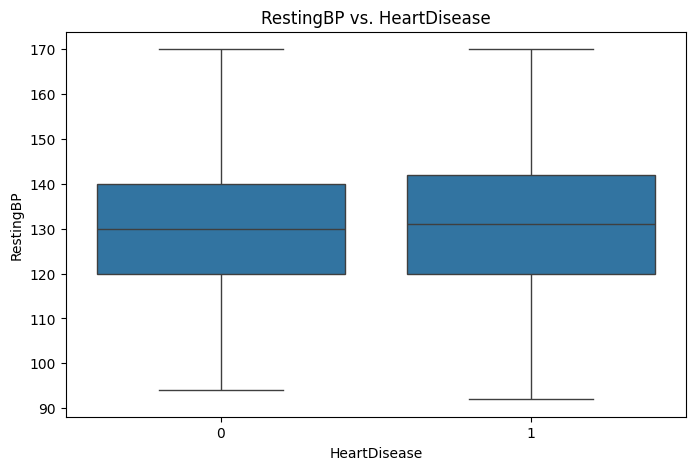

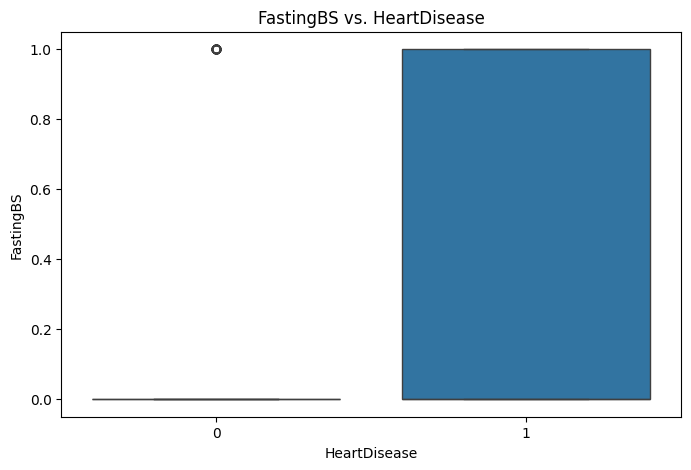

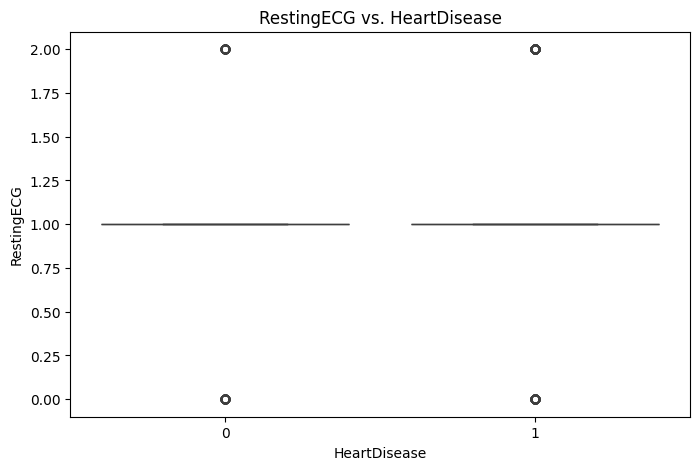

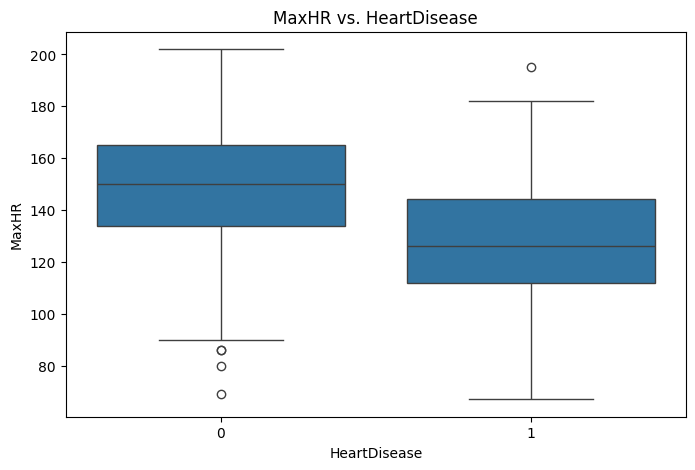

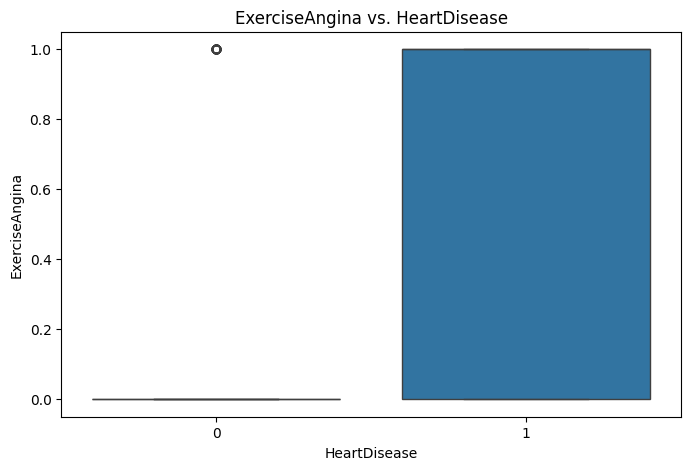

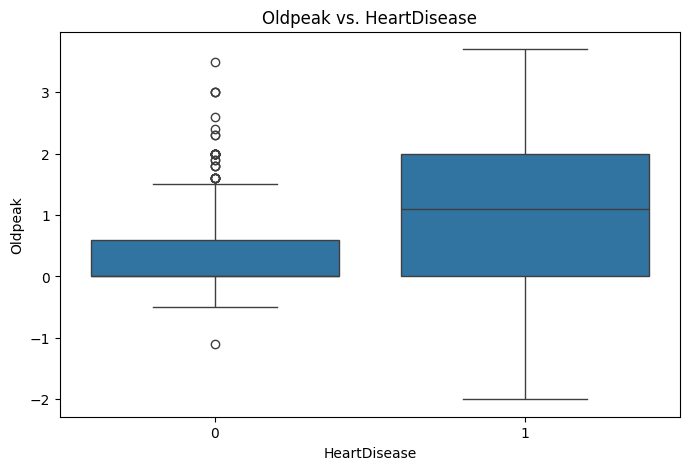

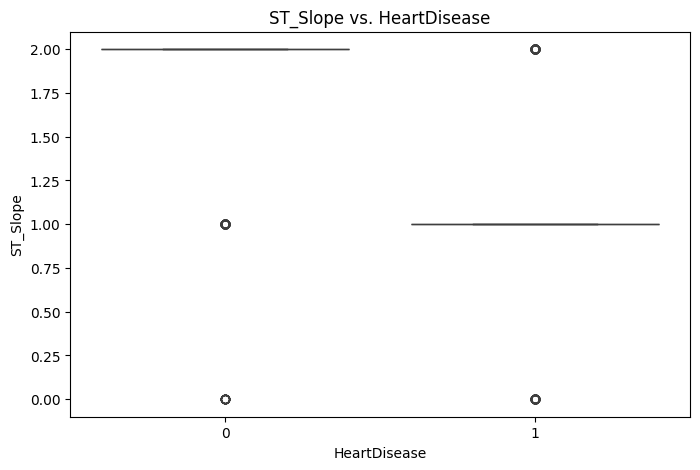

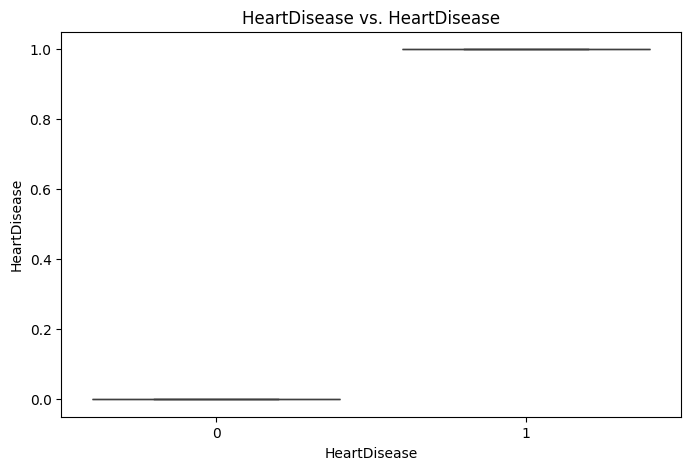

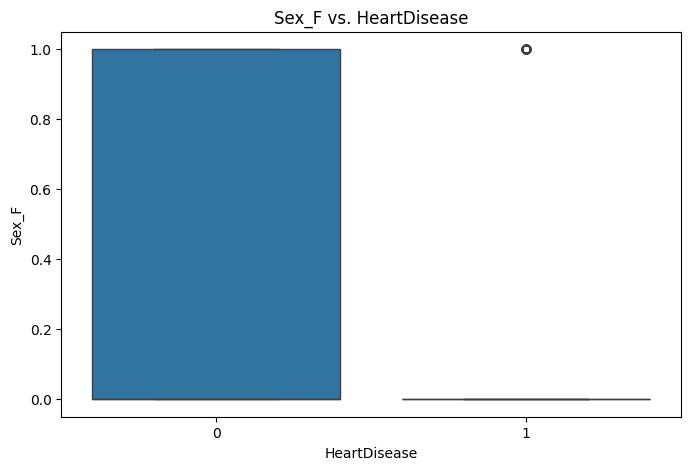

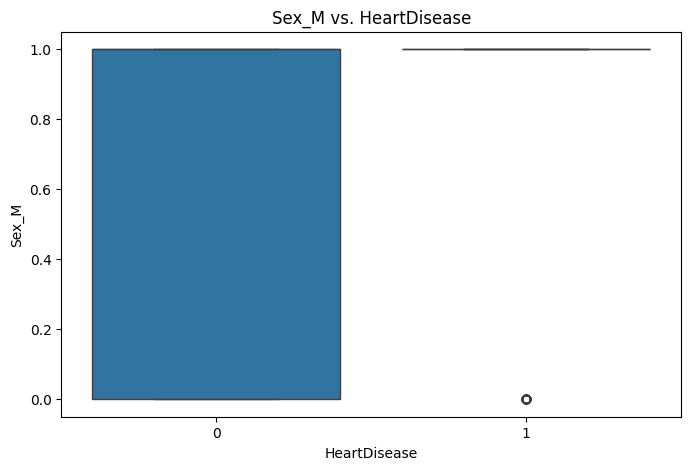

In [103]:
for col in df:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='HeartDisease', y=col, data=df)
    plt.title(f'{col} vs. HeartDisease')
    plt.show()

Information Gain (Mutual Information) scores with respect to 'HeartDisease'

In [104]:
X_mi = df.drop(columns=['HeartDisease'])
y_mi = df['HeartDisease']

In [105]:
mi_scores = mutual_info_classif(X_mi, y_mi, random_state=42)
mi_scores_df = pd.DataFrame({'Feature': X_mi.columns, 'Information Gain': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Information Gain', ascending=False)
mi_scores_df


,Feature,Information Gain
8,ST_Slope,0.195753
1,ChestPainType,0.155459
6,ExerciseAngina,0.119544
7,Oldpeak,0.097021
5,MaxHR,0.082871
9,Sex_F,0.063696
3,FastingBS,0.044731
10,Sex_M,0.034365
0,Age,0.033702
4,RestingECG,0.018055


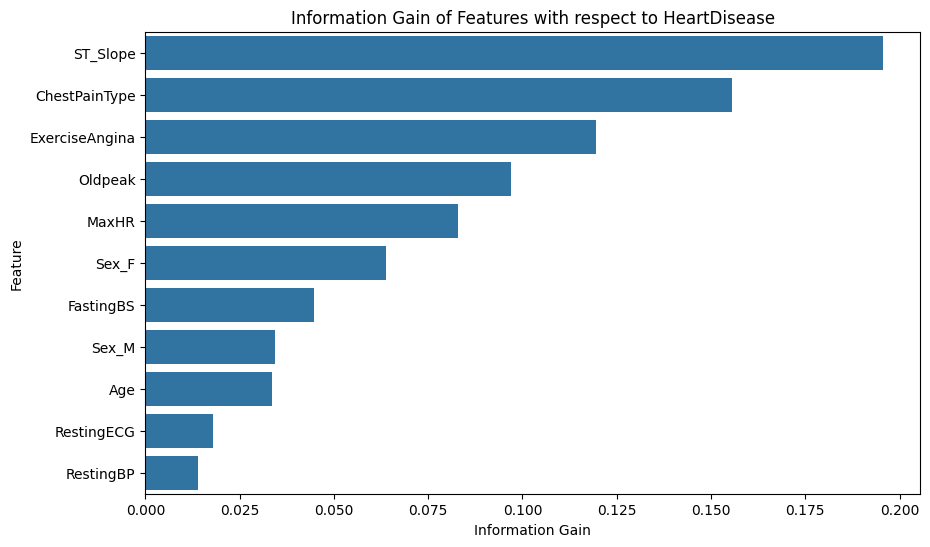

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Information Gain', y='Feature', data=mi_scores_df)
plt.title('Information Gain of Features with respect to HeartDisease')
plt.show()

Principle Component Analysis (PCA)

In [107]:
X_pca = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Apply StandardScaler before PCA

In [108]:
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_pca)

Determine number of components

In [109]:
pca = PCA()
pca.fit(X_scaled_pca)
explained_variance_ratio = pca.explained_variance_ratio_

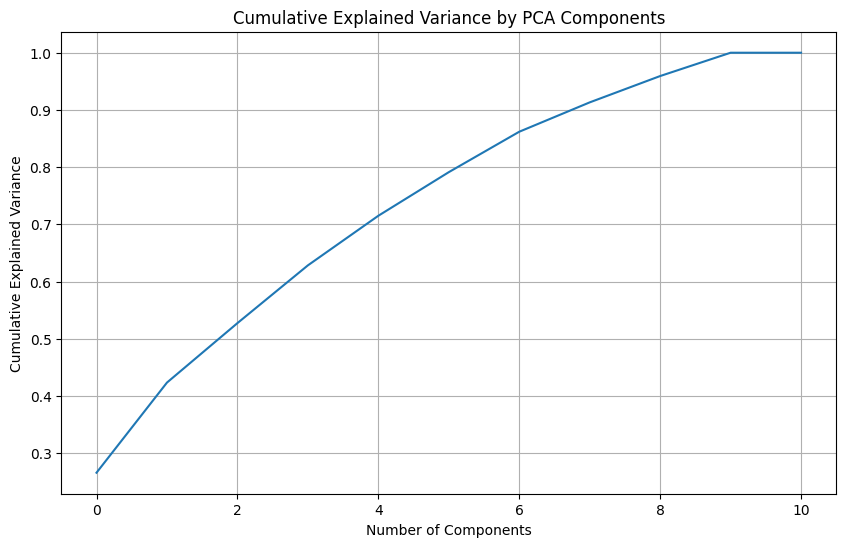

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

Decide on the number of components (e.g., to explain 95% variance)

In [111]:
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components}")

Number of components to explain 95% variance: 9


In [112]:
pca = PCA(n_components=n_components)
X_pca_transformed = pca.fit_transform(X_scaled_pca)
print(f"Shape of data after PCA: {X_pca_transformed.shape}")
print("First 5 rows of PCA transformed data:")
print(pd.DataFrame(X_pca_transformed).head())

Shape of data after PCA: (918, 9)
First 5 rows of PCA transformed data:
          0         1         2         3         4         5         6  \
0 -1.622680  1.764876  0.161514 -0.296981 -0.810574  0.365072 -0.968130   
1 -1.962878 -2.277947  1.201037 -0.385603 -0.871448  1.255907 -0.222140   
2 -0.581651  1.596771 -0.842663  1.767370 -1.188613  0.163001  0.498037   
3  0.020641 -2.992429 -1.401709 -0.048940 -0.698270  0.059400 -0.257008   
4 -0.651384  1.034515  1.581592  0.415045 -1.245315 -0.429871  0.508449   

          7         8  
0 -0.215978 -0.249520  
1 -0.874877 -0.977304  
2 -0.677922 -0.415777  
3 -0.772297  0.091303  
4 -0.487307 -0.027819  


In [113]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [114]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [115]:
print(f"Shape of scaled features: {X_scaled.shape}")
print("First 5 rows of scaled data:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Shape of scaled features: (918, 11)
First 5 rows of scaled data:
        Age  ChestPainType  RestingBP  FastingBS  RestingECG     MaxHR  \
0 -1.433140       0.229032   0.570104  -0.551341    0.017255  1.389825   
1 -0.478484       1.275059   1.853181  -0.551341    0.017255  0.754952   
2 -1.751359       0.229032  -0.071434  -0.551341    1.601219 -1.546464   
3 -0.584556      -0.816995   0.441796  -0.551341    0.017255 -1.149668   
4  0.051881       1.275059   1.211642  -0.551341    0.017255 -0.594154   

   ExerciseAngina   Oldpeak  ST_Slope     Sex_F     Sex_M  
0       -0.823556 -0.850247  1.052114 -0.515952  0.515952  
1       -0.823556  0.187964 -0.596078  1.938163 -1.938163  
2       -0.823556 -0.850247  1.052114 -0.515952  0.515952  
3        1.214246  0.707069 -0.596078  1.938163 -1.938163  
4       -0.823556 -0.850247  1.052114 -0.515952  0.515952  


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Hyperparameter Tuning using GridSearchCV

In [117]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression Grid Search
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
log_reg_grid = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_
print('Best Logistic Regression Params:', log_reg_grid.best_params_)

# Decision Tree Grid Search
dt_params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print('Best Decision Tree Params:', dt_grid.best_params_)

# Random Forest Grid Search
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print('Best Random Forest Params:', rf_grid.best_params_)

# KNN Grid Search
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
print('Best KNN Params:', knn_grid.best_params_)

Best Logistic Regression Params: {'C': 0.1, 'solver': 'liblinear'}


Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Random Forest Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [123]:
X_train.shape

(734, 11)

In [124]:
X_test.shape

(184, 11)

In [125]:
y_train.shape

(734,)

In [126]:
y_test.shape

(184,)

Use best estimators from GridSearchCV

In [127]:
log_reg_model = best_log_reg
dt_model = best_dt
rf_model = best_rf
knn_model = best_knn

Predict the test data and show actual vs predicted values

In [128]:
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

Create a DataFrame to show actual vs. predicted values

In [129]:
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Log_Reg_Predicted': y_pred_log_reg,
    'Decision_Tree_Predicted': y_pred_dt,
    'Random_Forest_Predicted': y_pred_rf,
    'KNN_Predicted': y_pred_knn
})

In [130]:
print("\nActual vs. Predicted Values (first 10 rows of test set):")
print(predictions_df.head(10))


Actual vs. Predicted Values (first 10 rows of test set):
     Actual  Log_Reg_Predicted  Decision_Tree_Predicted  \
356       1                  1                        1   
763       1                  0                        0   
817       1                  1                        1   
735       1                  0                        0   
892       0                  0                        0   
795       0                  1                        0   
234       0                  0                        0   
383       1                  0                        1   
642       0                  0                        0   
454       1                  1                        1   

     Random_Forest_Predicted  KNN_Predicted  
356                        1              1  
763                        0              0  
817                        1              1  
735                        1              1  
892                        0              0  
795             

In [131]:
models = {
    'Logistic Regression': log_reg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'KNN': knn_model
}

Evaluation accuracy

In [132]:
evaluation_results = {}

for name, model in models.items():
    print(f"\n--- Evaluating {name} ---")
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': cm,
        'Classification Report': report
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)



--- Evaluating Logistic Regression ---
Accuracy: 0.8478
Precision: 0.8558
Recall: 0.8725
F1-Score: 0.8641

Confusion Matrix:
[[67 15]
 [13 89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        82
           1       0.86      0.87      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184


--- Evaluating Decision Tree ---
Accuracy: 0.8207
Precision: 0.8710
Recall: 0.7941
F1-Score: 0.8308

Confusion Matrix:
[[70 12]
 [21 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        82
           1       0.87      0.79      0.83       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.82      0.82       184


--- Evaluatin

Compare the three models accuracy by visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_11416\3465722610.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models_names, y=scores, palette='viridis')


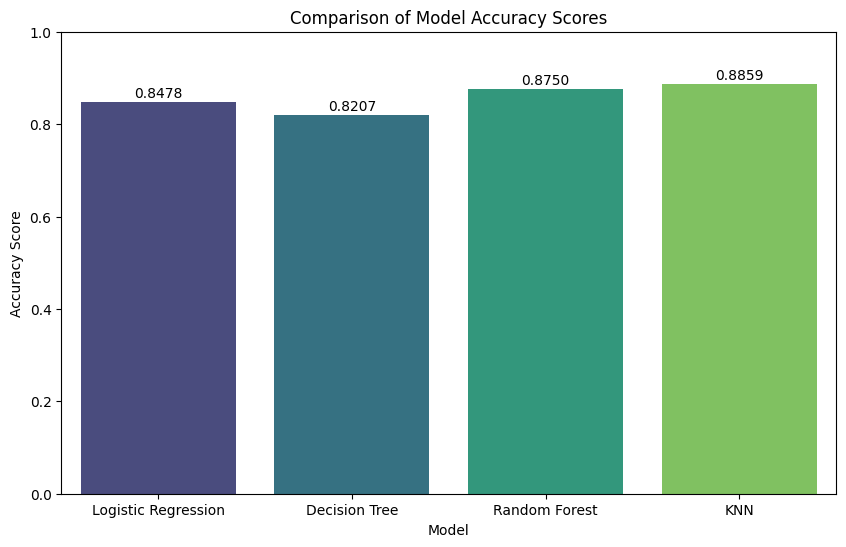

In [133]:
accuracy_scores = {name: results['Accuracy'] for name, results in evaluation_results.items()}
models_names = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=models_names, y=scores, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.ylim(0, 1) # Accuracy is between 0 and 1
for index, value in enumerate(scores):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center')
plt.show()

Comparison plot for Accuracy, Precision, Recall, F1-Score for all models

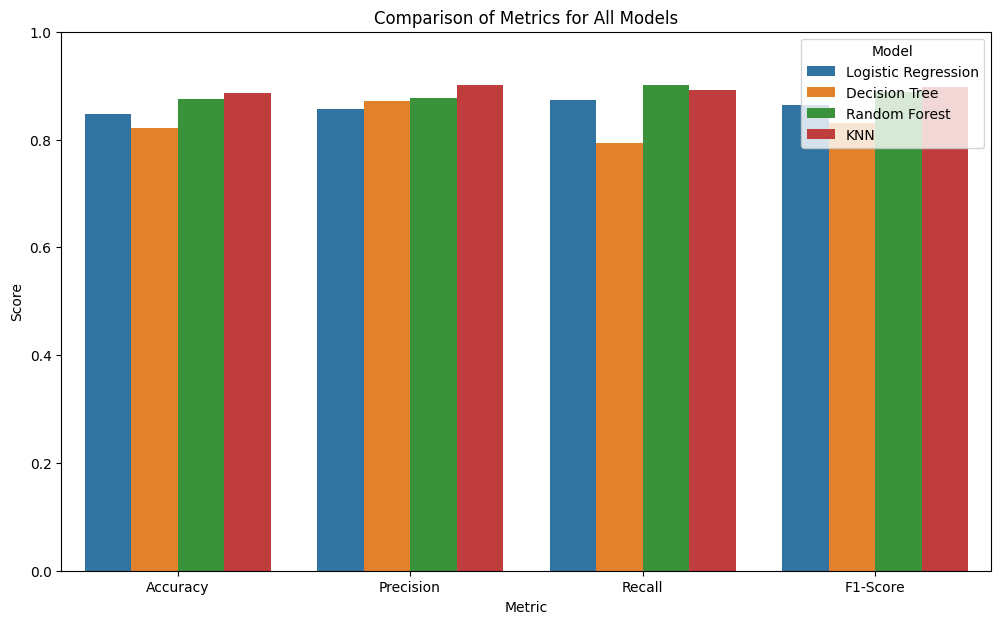

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
comparison_data = []
for model_name, results in evaluation_results.items():
    for metric in metrics:
        comparison_data.append({'Model': model_name, 'Metric': metric, 'Score': results[metric]})

comparison_df = pd.DataFrame(comparison_data)

plt.figure(figsize=(12, 7))
sns.barplot(data=comparison_df, x='Metric', y='Score', hue='Model')
plt.title('Comparison of Metrics for All Models')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.legend(title='Model')
plt.show()